In [1]:
import tsfresh as ts

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pickle

In [2]:
with open('../02_Daten/Kaffeemaschine/preprocessed_coffee_scaled.pickle', 'rb') as handle:
    df = pickle.load(handle)

### DF passend für tsfresh machen

In [3]:
df.head()

,time,day_number,day_name,Status,x,y,z
0,2022-01-28 10:39:28.532,4,Freitag,0,-0.286314,0.185127,-0.094353
1,2022-01-28 10:39:28.742,4,Freitag,0,-0.224631,0.579710,0.564770
2,2022-01-28 10:39:28.915,4,Freitag,0,0.104340,1.368876,0.011101
3,2022-01-28 10:39:29.237,4,Freitag,0,-0.327435,1.095703,-0.278910
4,2022-01-28 10:39:29.455,4,Freitag,0,0.289387,1.186761,-0.331649


In [3]:
df.drop(['day_number','day_name','Status'], axis=1, inplace=True)

In [4]:
df['id'] = 1

In [6]:
df.head()

,time,x,y,z,id
0,2022-01-28 10:39:28.532,-0.286314,0.185127,-0.094353,1
1,2022-01-28 10:39:28.742,-0.224631,0.579710,0.564770,1
2,2022-01-28 10:39:28.915,0.104340,1.368876,0.011101,1
3,2022-01-28 10:39:29.237,-0.327435,1.095703,-0.278910,1
4,2022-01-28 10:39:29.455,0.289387,1.186761,-0.331649,1


## Rolling

mit größerem Datensatz probieren

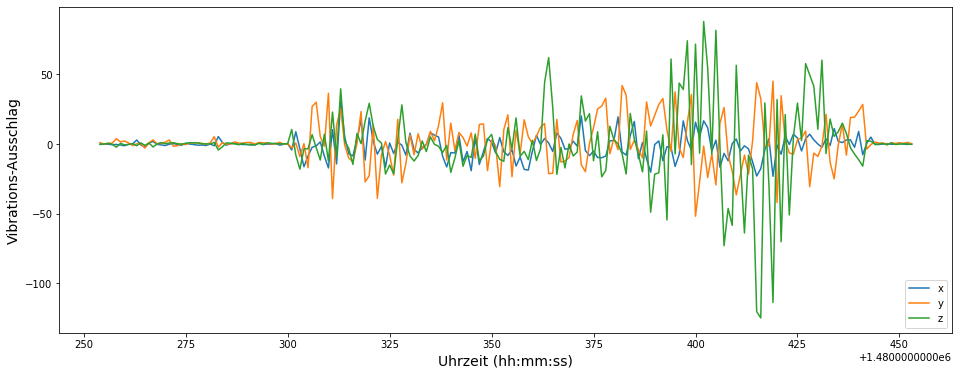

In [9]:
intersection = 1486345 - 5791
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time[intersection-300 : intersection-100], df.x[intersection-300 : intersection-100], label="x")
ax.plot(df.time[intersection-300 : intersection-100], df.y[intersection-300 : intersection-100], label='y')
ax.plot(df.time[intersection-300 : intersection-100], df.z[intersection-300 : intersection-100], label='z')

ax.set_xlabel("Uhrzeit (hh:mm:ss)", fontsize=14)
ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)

plt.legend(loc=4)

In [5]:
#df_small = df[1480000-100000:1480000+100000]
df_small = df[1480000-400000:1480000+400000]

In [6]:
df_small

,time,x,y,z,id
1080000,2022-01-30 15:05:17.526,-0.697528,0.488652,-0.278910,1
1080001,2022-01-30 15:05:17.721,0.248266,0.458300,0.301123,1
1080002,2022-01-30 15:05:17.901,0.063219,-0.270162,-1.412625,1
1080003,2022-01-30 15:05:18.088,-0.676967,0.519005,0.037464,1
1080004,2022-01-30 15:05:18.283,0.145462,-0.330867,0.696600,1
...,...,...,...,...,...
1879995,2022-02-01 06:11:00.297,-0.841453,0.094069,0.195657,1
1879996,2022-02-01 06:11:00.417,-0.347996,-1.089681,-0.621659,1
1879997,2022-02-01 06:11:00.574,-0.347996,-0.270162,-0.727126,1
1879998,2022-02-01 06:11:00.724,-0.368556,-0.270162,0.169294,1


In [7]:
df_small.time = df_small.index

c:\Users\pauls\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
df_small

,time,x,y,z,id
1080000,1080000,-0.697528,0.488652,-0.278910,1
1080001,1080001,0.248266,0.458300,0.301123,1
1080002,1080002,0.063219,-0.270162,-1.412625,1
1080003,1080003,-0.676967,0.519005,0.037464,1
1080004,1080004,0.145462,-0.330867,0.696600,1
...,...,...,...,...,...
1879995,1879995,-0.841453,0.094069,0.195657,1
1879996,1879996,-0.347996,-1.089681,-0.621659,1
1879997,1879997,-0.347996,-0.270162,-0.727126,1
1879998,1879998,-0.368556,-0.270162,0.169294,1


In [9]:
from tsfresh.utilities.dataframe_functions import roll_time_series
df_rolled = roll_time_series(df_small, column_id="id", column_sort="time", max_timeshift=250, rolling_direction=4) 
#rolling_direction: The absolute value decides, how much to shift at each step. -> um Zeit und Ressourcen zu sparen, immer 4 Schritte gehen

Rolling: 100%|██████████| 10/10 [1:27:29<00:00, 524.96s/it]


In [10]:
df_rolled

,time,x,y,z,id
0,1080000,-0.697528,0.488652,-0.278910,"(1, 1080003)"
1,1080001,0.248266,0.458300,0.301123,"(1, 1080003)"
2,1080002,0.063219,-0.270162,-1.412625,"(1, 1080003)"
3,1080003,-0.676967,0.519005,0.037464,"(1, 1080003)"
4,1080000,-0.697528,0.488652,-0.278910,"(1, 1080007)"
...,...,...,...,...,...
50192245,1879995,-0.841453,0.094069,0.195657,"(1, 1879999)"
50192246,1879996,-0.347996,-1.089681,-0.621659,"(1, 1879999)"
50192247,1879997,-0.347996,-0.270162,-0.727126,"(1, 1879999)"
50192248,1879998,-0.368556,-0.270162,0.169294,"(1, 1879999)"


In [11]:
with open('../df_rolled_800k.pickle', 'wb') as handle:
    pickle.dump(df_rolled, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters
settings = MinimalFCParameters()
#settings = EfficientFCParameters()
# eine minimale Auswahl an Parametern für extract_features, um Zeit und Ressourcen zu sparen
# weitere Möglichkeit ist EfficientFCParameters(), welche Features mit hohem Rechenaufwand nicht berechnet

In [14]:
from tsfresh import extract_features
df_features = extract_features(df_rolled, column_id="id", column_sort="time", default_fc_parameters=settings)

Feature Extraction: 100%|██████████| 10/10 [05:39<00:00, 33.93s/it]


In [15]:
df_features

x__sum_values  x__median   x__mean  x__length  \
1 1080003      -1.063011  -0.306874 -0.265753        4.0   
  1080007      -0.871817   0.011817 -0.108977        8.0   
  1080011      -0.824549   0.001537 -0.068712       12.0   
  1080015      -1.352981  -0.029304 -0.084561       16.0   
  1080019      -1.511321  -0.101267 -0.075566       20.0   
...                  ...        ...       ...        ...   
  1879983     -49.412380  -0.204070 -0.196862      251.0   
  1879987     -48.528269  -0.183510 -0.193340      251.0   
  1879991     -48.877801  -0.204070 -0.194732      251.0   
  1879995     -48.631072  -0.204070 -0.193749      251.0   
  1879999     -49.597426  -0.204070 -0.197599      251.0   

           x__standard_deviation  x__variance  x__root_mean_square  \
1 1080003               0.426604     0.181991             0.502609   
  1080007               0.358184     0.128296             0.374396   
  1080011               0.335173     0.112341             0.342144   
  1080015               0.311074     0.096767             0.322363   
  1080019               0.420610     0.176913             0.427344   
...                          ...          ...                  ...   
  1879983               0.294013     0.086444             0.353834   
  1879987               0.295560     0.087356             0.353180   
  1879991               0.295815     0.087507             0.354157   
  1879995               0.300808     0.090485             0.357804   
  1879999               0.303126     0.091885             0.361844   

           x__maximum  x__absolute_maximum  x__minimum  ...  z__sum_values  \
1 1080003    0.248266             0.697528   -0.697528  ...      -1.352947   
  1080007    0.248266             0.697528   -0.697528  ...      -0.543943   
  1080011    0.433312             0.697528   -0.697528  ...      -1.369571   
  1080015    0.433312             0.697528   -0.697528  ...      -1.246053   
  1080019    1.173498             1.173498   -0.697528  ...      -0.120662   
...               ...                  ...         ...  ...            ...   
  1879983    0.659480             1.005939   -1.005939  ...       6.319851   
  1879987    0.659480             1.005939   -1.005939  ...       6.557159   
  1879991    0.659480             1.005939   -1.005939  ...       6.108943   
  1879995    0.659480             1.005939   -1.005939  ...       5.898023   
  1879999    0.659480             1.005939   -1.005939  ...       4.263378   

           z__median   z__mean  z__length  z__standard_deviation  z__variance  \
1 1080003  -0.120723 -0.338237        4.0               0.653407     0.426940   
  1080007   0.037464 -0.067993        8.0               0.605255     0.366334   
  1080011   0.037464 -0.114131       12.0               0.597755     0.357311   
  1080015  -0.002081 -0.077878       16.0               0.549646     0.302110   
  1080019   0.037464 -0.006033       20.0               0.531591     0.282589   
...              ...       ...        ...                    ...          ...   
  1879983   0.011101  0.025179      251.0               0.398992     0.159195   
  1879987   0.011101  0.026124      251.0               0.398614     0.158893   
  1879991   0.011101  0.024338      251.0               0.399298     0.159439   
  1879995   0.037464  0.023498      251.0               0.397497     0.158004   
  1879999   0.011101  0.016986      251.0               0.397661     0.158134   

           z__root_mean_square  z__maximum  z__absolute_maximum  z__minimum  
1 1080003             0.735761    0.301123             1.412625   -1.412625  
  1080007             0.609062    0.696600             1.412625   -1.412625  
  1080011             0.608553    0.696600             1.412625   -1.412625  
  1080015             0.555135    0.696600             1.412625   -1.412625  
  1080019             0.531625    0.696600             1.412625   -1.412625  
...                        ...         ...                  ...        

In [16]:
df_features_finite = df_features.replace([np.inf, -np.inf], np.nan)

In [17]:
df_features_col_nan = df_features_finite.dropna(axis=1, how='all')

In [18]:
df_features_col_nan

x__sum_values  x__median   x__mean  x__length  \
1 1080003      -1.063011  -0.306874 -0.265753        4.0   
  1080007      -0.871817   0.011817 -0.108977        8.0   
  1080011      -0.824549   0.001537 -0.068712       12.0   
  1080015      -1.352981  -0.029304 -0.084561       16.0   
  1080019      -1.511321  -0.101267 -0.075566       20.0   
...                  ...        ...       ...        ...   
  1879983     -49.412380  -0.204070 -0.196862      251.0   
  1879987     -48.528269  -0.183510 -0.193340      251.0   
  1879991     -48.877801  -0.204070 -0.194732      251.0   
  1879995     -48.631072  -0.204070 -0.193749      251.0   
  1879999     -49.597426  -0.204070 -0.197599      251.0   

           x__standard_deviation  x__variance  x__root_mean_square  \
1 1080003               0.426604     0.181991             0.502609   
  1080007               0.358184     0.128296             0.374396   
  1080011               0.335173     0.112341             0.342144   
  1080015               0.311074     0.096767             0.322363   
  1080019               0.420610     0.176913             0.427344   
...                          ...          ...                  ...   
  1879983               0.294013     0.086444             0.353834   
  1879987               0.295560     0.087356             0.353180   
  1879991               0.295815     0.087507             0.354157   
  1879995               0.300808     0.090485             0.357804   
  1879999               0.303126     0.091885             0.361844   

           x__maximum  x__absolute_maximum  x__minimum  ...  z__sum_values  \
1 1080003    0.248266             0.697528   -0.697528  ...      -1.352947   
  1080007    0.248266             0.697528   -0.697528  ...      -0.543943   
  1080011    0.433312             0.697528   -0.697528  ...      -1.369571   
  1080015    0.433312             0.697528   -0.697528  ...      -1.246053   
  1080019    1.173498             1.173498   -0.697528  ...      -0.120662   
...               ...                  ...         ...  ...            ...   
  1879983    0.659480             1.005939   -1.005939  ...       6.319851   
  1879987    0.659480             1.005939   -1.005939  ...       6.557159   
  1879991    0.659480             1.005939   -1.005939  ...       6.108943   
  1879995    0.659480             1.005939   -1.005939  ...       5.898023   
  1879999    0.659480             1.005939   -1.005939  ...       4.263378   

           z__median   z__mean  z__length  z__standard_deviation  z__variance  \
1 1080003  -0.120723 -0.338237        4.0               0.653407     0.426940   
  1080007   0.037464 -0.067993        8.0               0.605255     0.366334   
  1080011   0.037464 -0.114131       12.0               0.597755     0.357311   
  1080015  -0.002081 -0.077878       16.0               0.549646     0.302110   
  1080019   0.037464 -0.006033       20.0               0.531591     0.282589   
...              ...       ...        ...                    ...          ...   
  1879983   0.011101  0.025179      251.0               0.398992     0.159195   
  1879987   0.011101  0.026124      251.0               0.398614     0.158893   
  1879991   0.011101  0.024338      251.0               0.399298     0.159439   
  1879995   0.037464  0.023498      251.0               0.397497     0.158004   
  1879999   0.011101  0.016986      251.0               0.397661     0.158134   

           z__root_mean_square  z__maximum  z__absolute_maximum  z__minimum  
1 1080003             0.735761    0.301123             1.412625   -1.412625  
  1080007             0.609062    0.696600             1.412625   -1.412625  
  1080011             0.608553    0.696600             1.412625   -1.412625  
  1080015             0.555135    0.696600             1.412625   -1.412625  
  1080019             0.531625    0.696600             1.412625   -1.412625  
...                        ...         ...                  ...        

In [19]:
df_features_interpolate = df_features_col_nan.interpolate(method ='linear', limit_direction ='backward')

In [20]:
np.any(np.isnan(df_features_interpolate))

False

In [21]:
df_features_interpolate_forward = df_features_interpolate.interpolate(method ='linear', limit_direction ='forward')

In [22]:
np.any(np.isnan(df_features_interpolate_forward))

False

In [23]:
df_features_interpolate_forward

x__sum_values  x__median   x__mean  x__length  \
1 1080003      -1.063011  -0.306874 -0.265753        4.0   
  1080007      -0.871817   0.011817 -0.108977        8.0   
  1080011      -0.824549   0.001537 -0.068712       12.0   
  1080015      -1.352981  -0.029304 -0.084561       16.0   
  1080019      -1.511321  -0.101267 -0.075566       20.0   
...                  ...        ...       ...        ...   
  1879983     -49.412380  -0.204070 -0.196862      251.0   
  1879987     -48.528269  -0.183510 -0.193340      251.0   
  1879991     -48.877801  -0.204070 -0.194732      251.0   
  1879995     -48.631072  -0.204070 -0.193749      251.0   
  1879999     -49.597426  -0.204070 -0.197599      251.0   

           x__standard_deviation  x__variance  x__root_mean_square  \
1 1080003               0.426604     0.181991             0.502609   
  1080007               0.358184     0.128296             0.374396   
  1080011               0.335173     0.112341             0.342144   
  1080015               0.311074     0.096767             0.322363   
  1080019               0.420610     0.176913             0.427344   
...                          ...          ...                  ...   
  1879983               0.294013     0.086444             0.353834   
  1879987               0.295560     0.087356             0.353180   
  1879991               0.295815     0.087507             0.354157   
  1879995               0.300808     0.090485             0.357804   
  1879999               0.303126     0.091885             0.361844   

           x__maximum  x__absolute_maximum  x__minimum  ...  z__sum_values  \
1 1080003    0.248266             0.697528   -0.697528  ...      -1.352947   
  1080007    0.248266             0.697528   -0.697528  ...      -0.543943   
  1080011    0.433312             0.697528   -0.697528  ...      -1.369571   
  1080015    0.433312             0.697528   -0.697528  ...      -1.246053   
  1080019    1.173498             1.173498   -0.697528  ...      -0.120662   
...               ...                  ...         ...  ...            ...   
  1879983    0.659480             1.005939   -1.005939  ...       6.319851   
  1879987    0.659480             1.005939   -1.005939  ...       6.557159   
  1879991    0.659480             1.005939   -1.005939  ...       6.108943   
  1879995    0.659480             1.005939   -1.005939  ...       5.898023   
  1879999    0.659480             1.005939   -1.005939  ...       4.263378   

           z__median   z__mean  z__length  z__standard_deviation  z__variance  \
1 1080003  -0.120723 -0.338237        4.0               0.653407     0.426940   
  1080007   0.037464 -0.067993        8.0               0.605255     0.366334   
  1080011   0.037464 -0.114131       12.0               0.597755     0.357311   
  1080015  -0.002081 -0.077878       16.0               0.549646     0.302110   
  1080019   0.037464 -0.006033       20.0               0.531591     0.282589   
...              ...       ...        ...                    ...          ...   
  1879983   0.011101  0.025179      251.0               0.398992     0.159195   
  1879987   0.011101  0.026124      251.0               0.398614     0.158893   
  1879991   0.011101  0.024338      251.0               0.399298     0.159439   
  1879995   0.037464  0.023498      251.0               0.397497     0.158004   
  1879999   0.011101  0.016986      251.0               0.397661     0.158134   

           z__root_mean_square  z__maximum  z__absolute_maximum  z__minimum  
1 1080003             0.735761    0.301123             1.412625   -1.412625  
  1080007             0.609062    0.696600             1.412625   -1.412625  
  1080011             0.608553    0.696600             1.412625   -1.412625  
  1080015             0.555135    0.696600             1.412625   -1.412625  
  1080019             0.531625    0.696600             1.412625   -1.412625  
...                        ...         ...                  ...        

In [24]:
df_features_interpolate_forward_rounded = df_features_interpolate_forward.round(6)

In [25]:
df_features_interpolate_forward_rounded

x__sum_values  x__median   x__mean  x__length  \
1 1080003      -1.063011  -0.306874 -0.265753        4.0   
  1080007      -0.871817   0.011817 -0.108977        8.0   
  1080011      -0.824549   0.001537 -0.068712       12.0   
  1080015      -1.352981  -0.029304 -0.084561       16.0   
  1080019      -1.511321  -0.101267 -0.075566       20.0   
...                  ...        ...       ...        ...   
  1879983     -49.412380  -0.204070 -0.196862      251.0   
  1879987     -48.528269  -0.183510 -0.193340      251.0   
  1879991     -48.877801  -0.204070 -0.194732      251.0   
  1879995     -48.631072  -0.204070 -0.193749      251.0   
  1879999     -49.597426  -0.204070 -0.197599      251.0   

           x__standard_deviation  x__variance  x__root_mean_square  \
1 1080003               0.426604     0.181991             0.502609   
  1080007               0.358184     0.128296             0.374396   
  1080011               0.335173     0.112341             0.342144   
  1080015               0.311074     0.096767             0.322363   
  1080019               0.420610     0.176913             0.427344   
...                          ...          ...                  ...   
  1879983               0.294013     0.086444             0.353834   
  1879987               0.295560     0.087356             0.353180   
  1879991               0.295815     0.087507             0.354157   
  1879995               0.300808     0.090485             0.357804   
  1879999               0.303126     0.091885             0.361844   

           x__maximum  x__absolute_maximum  x__minimum  ...  z__sum_values  \
1 1080003    0.248266             0.697528   -0.697528  ...      -1.352947   
  1080007    0.248266             0.697528   -0.697528  ...      -0.543943   
  1080011    0.433312             0.697528   -0.697528  ...      -1.369571   
  1080015    0.433312             0.697528   -0.697528  ...      -1.246053   
  1080019    1.173498             1.173498   -0.697528  ...      -0.120662   
...               ...                  ...         ...  ...            ...   
  1879983    0.659480             1.005939   -1.005939  ...       6.319851   
  1879987    0.659480             1.005939   -1.005939  ...       6.557159   
  1879991    0.659480             1.005939   -1.005939  ...       6.108943   
  1879995    0.659480             1.005939   -1.005939  ...       5.898023   
  1879999    0.659480             1.005939   -1.005939  ...       4.263378   

           z__median   z__mean  z__length  z__standard_deviation  z__variance  \
1 1080003  -0.120723 -0.338237        4.0               0.653407     0.426940   
  1080007   0.037464 -0.067993        8.0               0.605255     0.366334   
  1080011   0.037464 -0.114131       12.0               0.597755     0.357311   
  1080015  -0.002081 -0.077878       16.0               0.549646     0.302110   
  1080019   0.037464 -0.006033       20.0               0.531591     0.282589   
...              ...       ...        ...                    ...          ...   
  1879983   0.011101  0.025179      251.0               0.398992     0.159195   
  1879987   0.011101  0.026124      251.0               0.398614     0.158893   
  1879991   0.011101  0.024338      251.0               0.399298     0.159439   
  1879995   0.037464  0.023498      251.0               0.397497     0.158004   
  1879999   0.011101  0.016986      251.0               0.397661     0.158134   

           z__root_mean_square  z__maximum  z__absolute_maximum  z__minimum  
1 1080003             0.735761    0.301123             1.412625   -1.412625  
  1080007             0.609062    0.696600             1.412625   -1.412625  
  1080011             0.608553    0.696600             1.412625   -1.412625  
  1080015             0.555135    0.696600             1.412625   -1.412625  
  1080019             0.531625    0.696600             1.412625   -1.412625  
...                        ...         ...                  ...        

In [26]:
df_features_interpolate_forward_rounded.reset_index(inplace=True, drop=True)

In [27]:
df_features_interpolate_forward_rounded

,x__sum_values,x__median,x__mean,x__length,x__standard_deviation,x__variance,x__root_mean_square,x__maximum,x__absolute_maximum,x__minimum,...,z__sum_values,z__median,z__mean,z__length,z__standard_deviation,z__variance,z__root_mean_square,z__maximum,z__absolute_maximum,z__minimum
0,-1.063011,-0.306874,-0.265753,4.0,0.426604,0.181991,0.502609,0.248266,0.697528,-0.697528,...,-1.352947,-0.120723,-0.338237,4.0,0.653407,0.426940,0.735761,0.301123,1.412625,-1.412625
1,-0.871817,0.011817,-0.108977,8.0,0.358184,0.128296,0.374396,0.248266,0.697528,-0.697528,...,-0.543943,0.037464,-0.067993,8.0,0.605255,0.366334,0.609062,0.696600,1.412625,-1.412625
2,-0.824549,0.001537,-0.068712,12.0,0.335173,0.112341,0.342144,0.433312,0.697528,-0.697528,...,-1.369571,0.037464,-0.114131,12.0,0.597755,0.357311,0.608553,0.696600,1.412625,-1.412625
3,-1.352981,-0.029304,-0.084561,16.0,0.311074,0.096767,0.322363,0.433312,0.697528,-0.697528,...,-1.246053,-0.002081,-0.077878,16.0,0.549646,0.302110,0.555135,0.696600,1.412625,-1.412625
4,-1.511321,-0.101267,-0.075566,20.0,0.420610,0.176913,0.427344,1.173498,1.173498,-0.697528,...,-0.120662,0.037464,-0.006033,20.0,0.531591,0.282589,0.531625,0.696600,1.412625,-1.412625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-49.412380,-0.204070,-0.196862,251.0,0.294013,0.086444,0.353834,0.659480,1.005939,-1.005939,...,6.319851,0.011101,0.025179,251.0,0.398992,0.159195,0.399786,1.118452,1.118452,-1.017148
199996,-48.528269,-0.183510,-0.193340,251.0,0.295560,0.087356,0.353180,0.659480,1.005939,-1.005939,...,6.557159,0.011101,0.026124,251.0,0.398614,0.158893,0.399469,1.118452,1.118452,-1.017148
199997,-48.877801,-0.204070,-0.194732,251.0,0.295815,0.087507,0.354157,0.659480,1.005939,-1.005939,...,6.108943,0.011101,0.024338,251.0,0.399298,0.159439,0.400039,1.118452,1.118452,-1.017148
199998,-48.631072,-0.204070,-0.193749,251.0,0.300808,0.090485,0.357804,0.659480,1.005939,-1.005939,...,5.898023,0.037464,0.023498,251.0,0.397497,0.158004,0.398191,1.118452,1.118452,-1.017148


In [28]:
np.all(np.isfinite(df_features_interpolate_forward_rounded))

True

In [29]:
df_features_interpolate_forward_rounded.loc[50]

x__sum_values            -10.953797
x__median                 -0.060146
x__mean                   -0.053695
x__length                204.000000
x__standard_deviation      0.303090
x__variance                0.091864
x__root_mean_square        0.307810
x__maximum                 1.173498
x__absolute_maximum        1.173498
x__minimum                -0.738650
y__sum_values             59.558998
y__median                  0.276184
y__mean                    0.291956
y__length                204.000000
y__standard_deviation      0.460510
y__variance                0.212070
y__root_mean_square        0.545259
y__maximum                 1.429581
y__absolute_maximum        1.429581
y__minimum                -1.271796
z__sum_values              2.449579
z__median                 -0.015263
z__mean                    0.012008
z__length                204.000000
z__standard_deviation      0.402638
z__variance                0.162117
z__root_mean_square        0.402817
z__maximum                 1

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(df_features_interpolate_forward_rounded)

In [31]:
labels = kmeans.labels_

In [32]:
kmeans.cluster_centers_

array([[-1.69397430e+02, -6.72714192e-01, -6.74890157e-01,
         2.51000000e+02,  3.48621394e-01,  3.06728089e-01,
         7.75405934e-01,  4.04881650e-01,  1.76790952e+00,
        -1.72422627e+00,  1.10399844e+02,  4.43403808e-01,
         4.39840015e-01,  2.51000000e+02,  4.96492445e-01,
         9.80494791e-01,  7.07994084e-01,  2.00349210e+00,
         2.03967432e+00, -1.07172816e+00,  8.73881314e+00,
         3.53899099e-02,  3.48159885e-02,  2.51000000e+02,
         4.90346527e-01,  1.77313874e+00,  4.94100761e-01,
         1.53802215e+00,  1.77521079e+00, -1.60465597e+00],
       [-1.77570943e+01, -7.60392228e-02, -7.07682146e-02,
         2.50923349e+02,  3.16438086e-01,  1.04285797e-01,
         3.25930914e-01,  8.42513274e-01,  9.98028765e-01,
        -9.67278351e-01,  7.27801153e+01,  2.92204315e-01,
         2.90068479e-01,  2.50923349e+02,  4.28623507e-01,
         2.07904829e-01,  5.19934992e-01,  1.49684135e+00,
         1.50288534e+00, -9.51665569e-01, -3.42584049e+

In [33]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [34]:
vals = dict(zip(unique, counts))

In [35]:
vals

{0: 20358, 1: 94714, 2: 70559, 3: 14369}

In [ ]:
''' noch rausfinden:
Welche Zahl steht für welchen Status?
Wird Zeitfolge beachtet? -> Kommen gleiche Zahlen hintereinander vor (sollte so sein)?
Plotten oder Ähnliches
'''

In [36]:
len(labels)

200000

In [37]:
len(df_small)

800000

In [38]:
x = np.arange(200000)

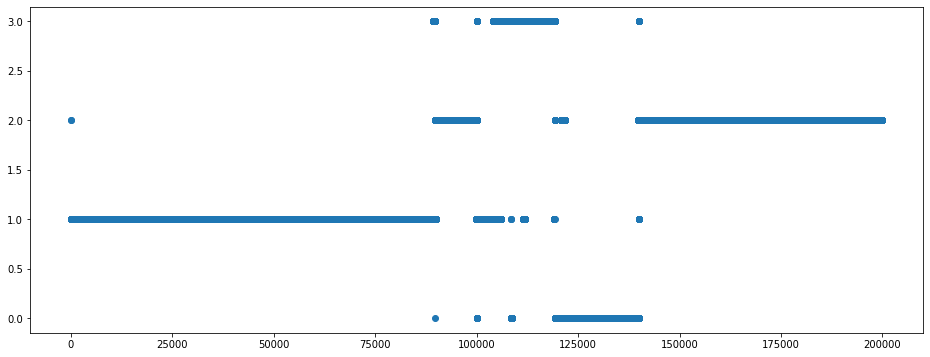

In [40]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(x, labels)

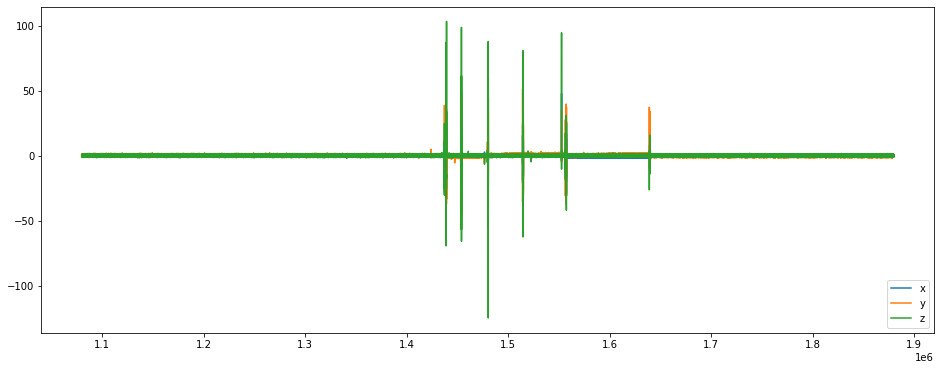

In [41]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df_small.time, df_small.x, label='x')
ax.plot(df_small.time, df_small.y, label='y')
ax.plot(df_small.time, df_small.z, label='z')

plt.legend(loc=4)